# LatticeMaze Demo

This notebook contains a tutorial for [LatticeMaze](../maze_transformer/generation/latticemaze.py), the central maze object in the maze_transformer library.

In [1]:
from maze_transformer.utils.notebook_utils import configure_notebook

import numpy as np
import matplotlib.pyplot as plt

from maze_transformer.generation.generators import LatticeMazeGenerators
from maze_transformer.evaluation.plot_maze import MazePlot

%matplotlib inline
configure_notebook(seed=42, dark_mode=True)

device(type='mps')

## Maze representation

The maze can be thought of as a grid of nodes, where an edge between nodes represents a path, and the lack of an edge represents a wall.

The following generates a 4x4 maze using depth-first search.

In [2]:
maze = LatticeMazeGenerators.gen_dfs(np.array([4,4]))

maze

LatticeMaze(lattice_dim=2, connection_list=array([[[ True, False, False,  True],
        [False, False, False,  True],
        [ True, False,  True, False],
        [False, False, False, False]],

       [[False,  True,  True, False],
        [ True,  True,  True, False],
        [ True, False,  True, False],
        [ True,  True,  True, False]]]), generation_meta={'func_name': 'gen_dfs', 'grid_shape': array([4, 4]), 'start_coord': (0, 0)})

### Connection List
In the above cell, we can see the canonical representation of the maze, the *connection list*.  To understand this representation, consider the following connection list for a 2x2 maze.
```
[
    [ # down
        [F T],
        [F F]
    ],
    [ # right
        [T F],
        [T F]
    ]
]
```

The two matrices in the connection list represent the *downward* and *rightward* connections, respectively. It tells us whether a given node has a connection in that direction.
```
down:  N  N     right:  N - N
          |           
       N  N             N - N
```

Note that the bottom row connections going down, and the right-hand column connections going right, will always be False.

We can superimpose the downward and rightward connections to visualize the maze:
```
N - N
    |
N - N
```

---

Using the same method, we can interpret the connection list for the original maze:


In [3]:
maze.connection_list

array([[[ True, False, False,  True],
        [False, False, False,  True],
        [ True, False,  True, False],
        [False, False, False, False]],

       [[False,  True,  True, False],
        [ True,  True,  True, False],
        [ True, False,  True, False],
        [ True,  True,  True, False]]])

```
N   N - N - N
|           |
N - N - N - N
            |
N - N   N - N
|       | 
N - N - N - N
```

### Adjacency list

Another common maze representation structure is an adjacency list, which is literally a list of every pair of adjacent nodes in the maze.

We can view the adjacency list representation of the graph using `LatticeMaze.as_adjlist`

In [4]:
for start, end in maze.as_adj_list():
    print(f"({start[0]}, {start[1]}) <--> ({end[0]}, {end[1]})")

(3, 1) <--> (3, 0)
(2, 0) <--> (2, 1)
(0, 2) <--> (0, 3)
(3, 2) <--> (3, 3)
(3, 0) <--> (2, 0)
(1, 3) <--> (0, 3)
(1, 1) <--> (1, 0)
(2, 3) <--> (1, 3)
(3, 1) <--> (3, 2)
(1, 2) <--> (1, 1)
(0, 1) <--> (0, 2)
(1, 3) <--> (1, 2)
(2, 3) <--> (2, 2)
(0, 0) <--> (1, 0)
(2, 2) <--> (3, 2)


## Plotting a maze

The `MazePlot` class bundles our plotting functionality.
We can use `.show()` to display the maze:

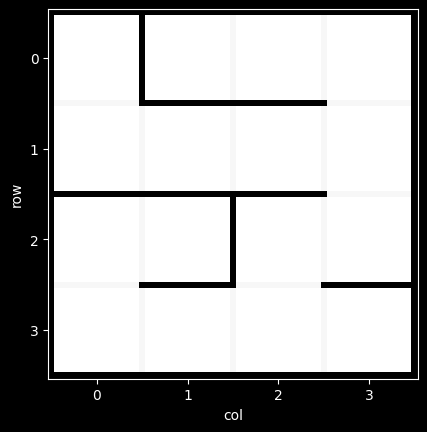

In [9]:
MazePlot(maze).show()

Notes: 
1. If the image is blurred or displays walls with inconsistent thickness, use `.show(dpi=200)` (by default `dpi = 100`).
2. The adjacency list contains coordinates in `(row, column)` notation. This is the inverse of cartesian coordinates `(x, y)` with a horizontal x-axis.

## Solving the maze algorithmically

`LatticeMaze.find_shortest_path` uses the A* algorithm to find the optimal path through the maze.

In [10]:
true_path = maze.find_shortest_path(
    c_start=(0, 0),
    c_end=(3, 3)
)

print(f"{true_path =}")

true_path =[(0, 0), (1, 0), (1, 1), (1, 2), (1, 3), (2, 3), (2, 2), (3, 2), (3, 3)]


We can plot the shortest path with `.add_true_path()`.

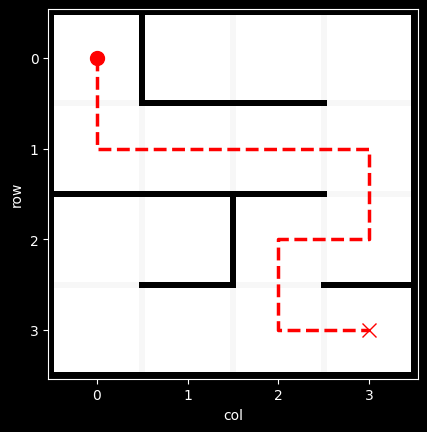

In [11]:
MazePlot(maze).add_true_path(true_path).show()

## Other Plotting functionality

Displaying one or more predicted paths

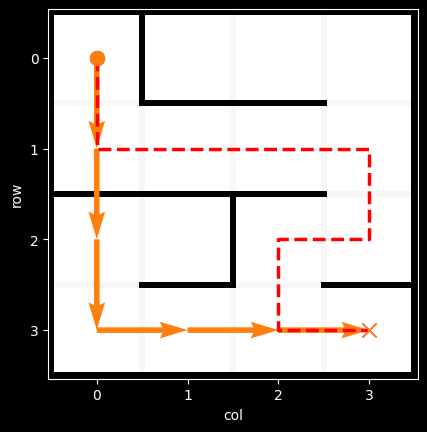

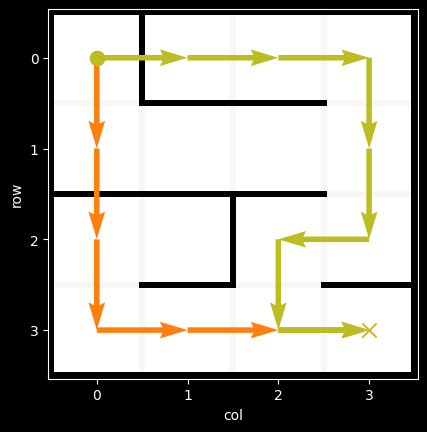

In [12]:
pred_path1 = [(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (3, 3)]
pred_path2 = [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (2, 2), (3, 2), (3, 3)]

MazePlot(maze).add_true_path(true_path).add_predicted_path(pred_path1).show()
MazePlot(maze).add_multiple_paths([pred_path1, pred_path2]).show()

Displaying node values (e.g. for plotting attention)

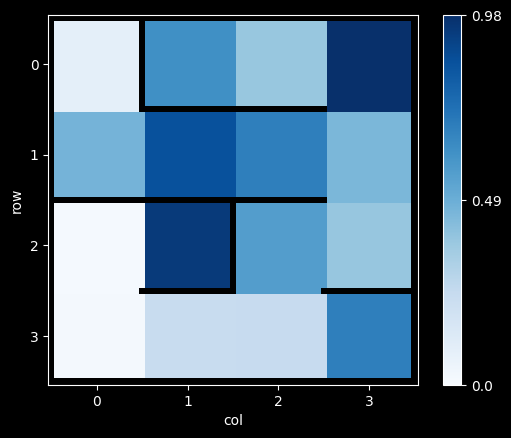

In [13]:
node_values = np.random.uniform(size=maze.grid_shape)

MazePlot(maze).add_node_values(node_values, color_map="Blues").show()

For plotting attention in particular, it's useful to mark target node (the one that the attiention is being calculated for), as well as the nodes in the maze preceeding this token (the only nodes that can attention can be calculated for w.r.t. target node). The image otherwise suggests each target token token can see every positional token.

We plot the target node and preceeding nodes by passing `target_token_coord` and `preceeding_token_coord` to the `.add_node_values()` function. 

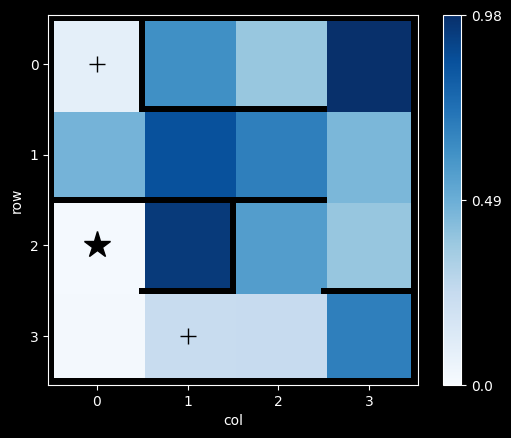

In [27]:
MazePlot(maze).add_node_values(node_values,
                                color_map="Blues",
                                target_token_coord= np.array([2, 0]),
                                preceeding_tokens_coords = np.array([[0,0], [3,1]])
                                ).show()

Plotting a maze as a string (e.g. for quick debugging via commandline)

In [28]:
ascii_maze = MazePlot(maze).as_ascii()
print(ascii_maze)

#########
# #     #
# ##### #
#       #
####### #
#   #   #
# ### ###
#       #
#########

